# TP 2
#### 1.1 Lecture du benchmark

In [7]:
from scipy.io.arff import loadarff
import pandas as pd

data_frame = None
file_path = '../heart.csv'
if file_path.endswith('.csv'):
    data_frame = pd.read_csv(file_path)
elif file_path.endswith('.arff'):
    raw_data = loadarff(file_path)
    data_frame = pd.DataFrame(raw_data[0])
else:
    print("Format de fichier non pris en charge.")

print(data_frame.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   55    1   1     120   236    0        1       178     0      0.8    2   
4   56    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


#### 1.2 Preprocessing des donnes
Dans cette phase en s'assure que les donnees en bien ete lu et que il n'existent pas de donnees manquantes.

In [8]:
# remplacer les valeurs manquantes si elles existent
attributs = data_frame.columns
print(attributs)
for attribut in data_frame.columns:
    a = data_frame[attribut]
    if a.dtype == "object":
        data_frame.replace('?', a.mode().values[0], inplace=True)
    else:
        data_frame.replace('?', a.median(), inplace=True)

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   55    1   1     120   236    0        1       178     0      0.8    2   
4   56    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


#### 2. La courbe elbow
On va lancer l'algorithme de k-means plusieurs fois avec un nombre differents de cluster (on va choisir 20 clusters)

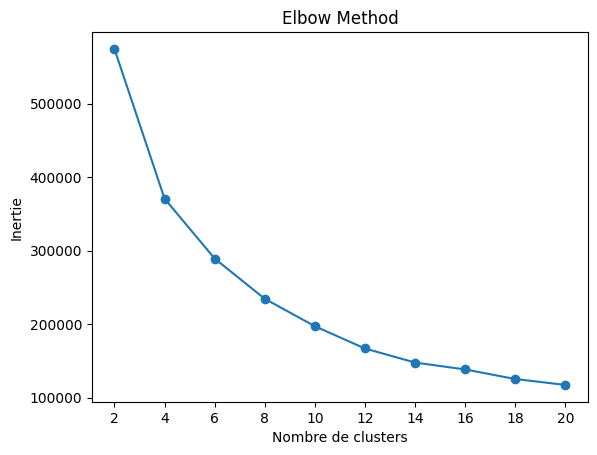

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = data_frame.values
results = {}

for i in range(2, 21, 2):
    model = KMeans(n_clusters=i, n_init="auto").fit(data)
    results[i] = round(model.inertia_, 2)

clusters = list(results.keys())
inertia = list(results.values())
plt.plot(clusters, inertia, marker='o')
plt.xticks(clusters)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Elbow Method')
plt.show()

#### 3.1 Algorithme de K-means
On execute l'algorithme de K-means avec le nombre optimale qu'on a obtenu a l'aide de la courbe elbow

In [10]:
n_clusters = int(input("Entrez le nombre de clusters: "))

kmeans_model = KMeans(n_clusters=n_clusters, n_init="auto").fit(data)

#### 3.2 Distances inter-classes et intra-classes 
Distances inter-classes: c'est la somme des distances entres les centroids de tous les clusters.

Distances intra-classes: c'est la somme des distances entres les points et leur centroids pour tous les clusters.

In [11]:
from math import sqrt

def distance_euclidienne(a, b):
    dist = []
    for i in range(len(a)):
        dist.append((a[i] - b[i])**2)
    
    return sqrt(sum(dist))

# distance inter-classes
distance_inter_classe_kmeans = round(kmeans_model.inertia_, 2)
# distance intra-classe
centroids_coords = {}
distance_intra_classe_kmeans = 0

for index, i in enumerate(kmeans_model.cluster_centers_):
    centroids_coords[index] = i

for centroid_1 in centroids_coords:
    for centroid_2 in centroids_coords:
        if centroid_1 != centroid_2:
            dist = distance_euclidienne(centroids_coords[centroid_1], centroids_coords[centroid_2]) 
            distance_intra_classe_kmeans += dist

distance_intra_classe_kmeans = round(distance_intra_classe_kmeans, 2)

#### 4.1 Algorithme de K-medoids
On execute l'algorithme de K-medoids avec le nombre optimale qu'on a obtenu a l'aide de la courbe elbow

In [12]:
from sklearn_extra.cluster import KMedoids

n_clusters = int(input("Entrez le nombre de clusters: "))

kmedoid_model = KMedoids(n_clusters=n_clusters).fit(data)


#### 4.2 Distances inter-classes et intra-classes
Distances inter-classes: c'est la somme des distances entres les centroids de tous les clusters.

Distances intra-classes: c'est la somme des distances entres les points et leur centroids pour tous les clusters.

In [13]:
# distance inter-classes
distance_inter_classe_kmedoid = round(kmedoid_model.inertia_, 2)
# distance intra-classe
centroids_coords = {}
distance_intra_classe_kmedoid = 0

for index, i in enumerate(kmedoid_model.cluster_centers_):
    centroids_coords[index] = i

for centroid_1 in centroids_coords:
    for centroid_2 in centroids_coords:
        if centroid_1 != centroid_2:
            dist = distance_euclidienne(centroids_coords[centroid_1], centroids_coords[centroid_2]) 
            distance_intra_classe_kmedoid += dist

distance_intra_classe_kmedoid = round(distance_intra_classe_kmedoid, 2)

#### 5. Histogramme des inerties des deux methodes 
On etablit l'histrogramme afind de comparer la performances des deux algorithemes

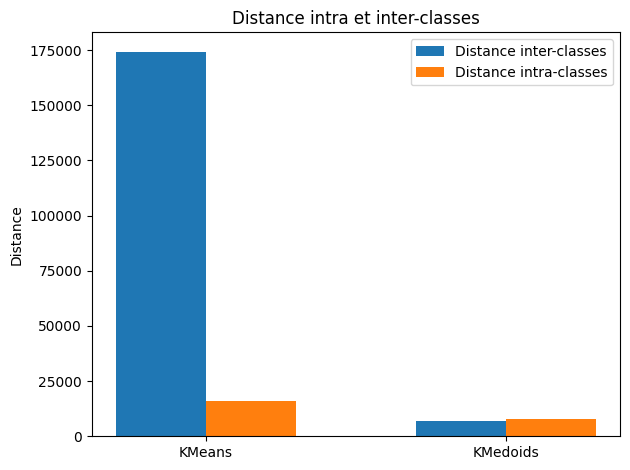

In [14]:
# histogramme afin de comparer les deux méthodes
import numpy as np

labels = ['KMeans', 'KMedoids']
inter_classes = [distance_inter_classe_kmeans, distance_inter_classe_kmedoid]
intra_classes = [distance_intra_classe_kmeans, distance_intra_classe_kmedoid]

x = np.array([0, 1])
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, inter_classes, width, label='Distance inter-classes')
rects2 = ax.bar(x + width/2, intra_classes, width, label='Distance intra-classes')

ax.set_ylabel('Distance')
ax.set_title('Distance intra et inter-classes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Conclusion
On conclut que la methode de KMedoids et mieux que le KMeans puisque on obtient des distances bcp moins importantes, et en plus pour le KMeans on au une distance inter-classe tres grande par rapport a la meme distance pour le KMedoids et ceci est probablement a cause des outliers